# Resampling, Hyperparameter Tuning & Model Selection

## Load Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

## Load Dataset & Inspection

In [2]:
training_data = pd.read_csv("./dataset/GiveMeSomeCredit/cs-training.csv")
test_data = pd.read_csv("./dataset/GiveMeSomeCredit/cs-test.csv")

In [3]:
# Membaca metadata
pd.read_excel("./dataset/GiveMeSomeCredit/Data Dictionary.xls")

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


**Training Data**

In [4]:
training_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [6]:
training_data.shape

(150000, 12)

In [7]:
training_data.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

**Test Data**

In [8]:
test_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
Unnamed: 0                              101503 non-null int64
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           81400 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      98877 non-null float64
dtypes: float64(5), int64(7)
memory usage: 9.3 MB


In [10]:
test_data.isna().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [11]:
training_data = training_data.iloc[:,1:]

test_data = test_data.iloc[:,2:]

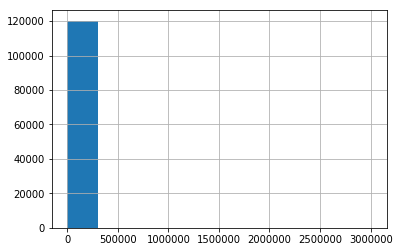

In [12]:
training_data['MonthlyIncome'].hist()

In [13]:
training_data[training_data['MonthlyIncome'] == 0.0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
14,0,0.019657,76,0,477.0,0.0,6,0,1,0,0.0
50,0,0.818978,73,0,3095.0,0.0,9,0,1,1,0.0
73,0,0.059669,31,0,3162.0,0.0,11,0,2,0,1.0
90,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
298,0,0.085152,25,0,1005.0,0.0,5,0,0,0,0.0
326,0,0.013115,43,0,4211.0,0.0,21,0,2,0,2.0
508,0,1.000000,73,0,8500.0,0.0,2,0,0,0,0.0
537,0,0.086635,40,0,887.0,0.0,8,0,1,0,1.0
605,0,0.155742,39,0,723.0,0.0,13,0,0,0,2.0
629,0,1.000000,40,0,2866.0,0.0,2,0,2,0,0.0


In [14]:
training_data['MonthlyIncome'] = training_data['MonthlyIncome'].fillna(training_data['MonthlyIncome'].median(skipna=True))

In [15]:
training_data['NumberOfDependents'].median()

0.0

In [17]:
training_data['NumberOfDependents'] = training_data['NumberOfDependents'].astype('object')

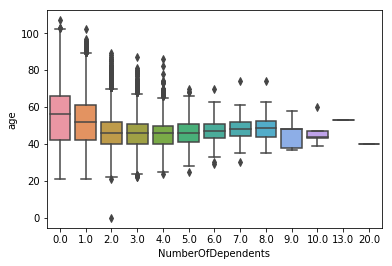

In [18]:
sns.boxplot(x='NumberOfDependents', y='age', data=training_data);

In [19]:
training_data['NumberOfDependents'] = training_data['NumberOfDependents'].fillna(0)

In [20]:
training_data.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## Resampling & Cross-Validation

Beberapa metode resampling yang dapat digunakan diantaranya adalah:

- Hold-out Validation
- K-Fold Cross-Validation
- Leave-One-Out Validation


### Hold-Out

Pada metode hold-out, data dipisah menjadi data training dan data validasi

![Hold-Out](./images/holdout.png)

Sumber gambar: https://machine-learning-course.readthedocs.io/en/latest/content/overview/crossvalidation.html

In [21]:
data_train = training_data.groupby("SeriousDlqin2yrs", group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state=1000))

data_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
96384,0,0.270098,68,1,2244.000000,5400.0,13,0,2,0,0.0
16538,0,0.098004,58,1,0.267390,4700.0,6,0,1,0,0.0
14062,0,0.284938,63,0,0.223490,10250.0,7,0,2,0,0.0
125815,0,0.365282,51,0,219.000000,5400.0,1,0,0,0,0.0
101835,0,0.534208,47,0,0.649672,6550.0,9,0,3,0,2.0
16030,0,0.000000,42,0,0.344553,9655.0,4,0,2,0,0.0
114711,0,0.654947,40,0,1249.500000,1.0,5,0,2,0,3.0
47723,0,0.309392,55,0,0.203552,8783.0,14,0,1,0,0.0
42726,0,0.016328,56,0,0.205288,5937.0,3,0,1,0,0.0
39880,0,0.035908,42,0,1.166333,2500.0,6,0,2,0,2.0


In [22]:
data_validasi = training_data.drop(data_train.index)

data_validasi

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
12,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
18,0,0.221813,43,0,0.527888,3280.0,7,0,1,0,2.0
19,0,0.602794,25,0,0.065868,333.0,2,0,0,0,0.0
21,1,0.025656,38,0,0.475841,3000.0,7,0,1,0,2.0
22,0,1.000000,39,0,0.241104,2500.0,4,0,0,0,0.0
27,0,0.034421,69,0,0.042383,2500.0,17,0,0,0,1.0
29,0,0.392995,58,2,0.436103,5500.0,15,0,1,0,0.0
36,0,0.881836,50,3,0.567858,4000.0,9,0,1,0,1.0
40,0,0.719985,41,1,0.539554,5700.0,14,0,1,0,0.0
48,0,0.834048,38,0,0.393662,13000.0,13,0,2,0,2.0


**Menggunakan Scikit-Learn train_test_split**

In [23]:
training_data.iloc[:,1:].values

array([[ 0.76612661, 45.        ,  2.        , ...,  6.        ,
         0.        ,  2.        ],
       [ 0.95715102, 40.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.65818014, 38.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.24604392, 58.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , 30.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85028295, 64.        ,  0.        , ...,  2.        ,
         0.        ,  0.        ]])

In [24]:
nilai_X = training_data.iloc[:,1:].values
nilai_y = training_data['SeriousDlqin2yrs'].values

X_train, X_val, y_train, y_val = train_test_split(nilai_X, nilai_y, test_size=0.2, stratify=nilai_y)

In [25]:
print("Ukuran X_train: ", X_train.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran X_val: ", X_val.shape)
print("Ukuran y_val: ", y_val.shape)

Ukuran X_train:  (120000, 10)
Ukuran y_train:  (120000,)
Ukuran X_val:  (30000, 10)
Ukuran y_val:  (30000,)


### K-Fold

Pada metode K-Fold, data dibagi menjadi data training dan data validasi dengan mengulang-ulang metode hold-out sebanyak k-kali. Hal ini berfungsi untuk mengurangi bias pada model.

![Kfold](./images/kfold.png)

Sumber gambar: https://machine-learning-course.readthedocs.io/en/latest/content/overview/crossvalidation.html#holdout-method

In [26]:
folding = StratifiedKFold(n_splits=5)

folding.get_n_splits(nilai_X, nilai_y)

5

In [27]:
for training_index, test_index in folding.split(nilai_X, nilai_y):
    print("Index X: ", training_index, " dan Index y: ", test_index)

Index X:  [ 29932  29933  29934 ... 149997 149998 149999]  dan Index y:  [    0     1     2 ... 30887 30945 30986]
Index X:  [     0      1      2 ... 149997 149998 149999]  dan Index y:  [29932 29933 29934 ... 60044 60047 60053]
Index X:  [     0      1      2 ... 149997 149998 149999]  dan Index y:  [59996 59997 59998 ... 90908 90961 90962]
Index X:  [     0      1      2 ... 149997 149998 149999]  dan Index y:  [ 89946  89947  89948 ... 120571 120572 120576]
Index X:  [     0      1      2 ... 120571 120572 120576]  dan Index y:  [119959 119960 119961 ... 149997 149998 149999]


### Leave-One-Out

Pada metode leave-one-out, data dibagi menjadi 2 layaknya hold-out, perbedaannya adalah yang dipakai menjadi data validasi hanya 1 baris/record data saja.

![Leave-One-Out](./images/lou.png)

Sumber gambar: https://medium.com/datadriveninvestor/k-fold-and-other-cross-validation-techniques-6c03a2563f1e

In [28]:
buang_atu = LeaveOneOut()

buang_atu.get_n_splits(nilai_X)

150000

In [ ]:
for training_index, test_index in buang_atu.split(nilai_X):
    print("Fold ke")
    print("Ukuran X: ", training_index.shape, " dan ukuran y: ", test_index.shape)
    print("")

## Hyperparameter Tuning

Terdapat dua metode yang paling umum untuk mencari model mana yang paling optimal tergantung dari seberapa baik performanya, yaitu:

- Metode Grid Search
- Metode Random Search

![Hyperparameter Tuning](./images/evaluate_overview.png)

**Inisiasi Grid**

In [30]:
# menentukan jumlah estimator
n_estimators = [10, 20]
# Menentukan jumlah feature yang digunakan dalam tiap split
max_features = ['auto', 'sqrt']
# Menentukan tingkat kedalaman pohon keputusan
max_depth = [5, 6, 7, 8]
# Menentukan jumlah minimum sampel untuk melakukan split pada node
min_samples_split = [2, 5, 10]
# Menentukan jumlah sampel minimum untuk melakukan split pada leaf
min_samples_leaf = [1, 2, 4]
# Metode penentuan sampling
bootstrap = [True, False]

# inisiasi grid
inisiasi_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

inisiasi_grid

{'n_estimators': [10, 20],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 6, 7, 8],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

### Random Search

Random Search akan mencari parameter optimal secara acak tanpa harus mencoba semua kombinasi nilai.

**Inisiasi Model RandomForest**

In [31]:
model_random_forest = RandomForestClassifier()

**Pembuatan Model GridCV**

In [32]:
# inisisasi RandomizedSearchCV
model_random_cv = RandomizedSearchCV(estimator=model_random_forest, 
                                     param_distributions=inisiasi_grid,
                                     n_iter=2,
                                     cv=folding,
                                    random_state=1000,
                                    n_jobs=1)

# model fitting
model_random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
          error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=2, n_jobs=3,
          param_distributions={'n_estimators': [10, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 6, 7, 8], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=1000, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

**Cek Best Estimator**

In [33]:
model_random_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Prediksi**

In [34]:
hasil_prediksi = model_random_cv.predict(X_val)

hasil_prediksi

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
accuracy_score(y_val, hasil_prediksi)

0.936

**Mengubah Hasil Prediksi Menjadi Probabilitas**

In [36]:
hasil_prediksi = model_random_cv.predict_proba(X_val)

In [37]:
pd.DataFrame(hasil_prediksi, columns=['Probabilitas P(0)', 'Probabilitas P(1)'])

,Probabilitas P(0),Probabilitas P(1)
0,0.950252,0.049748
1,0.969562,0.030438
2,0.281620,0.718380
3,0.862785,0.137215
4,0.986365,0.013635
5,0.948697,0.051303
6,0.944373,0.055627
7,0.983635,0.016365
8,0.989381,0.010619
9,0.984154,0.015846


## Grid Search

Grid Search akan mencari parameter optimal secara greedy.

In [ ]:
model_grid_cv = GridSearchCV(estimator=model_random_forest, 
                                 param_grid=inisiasi_grid, 
                                 cv=folding, 
                                 n_jobs=1)

model_grid_cv.fit(X_train, y_train)

# Tugas:

Buatlah model yang paling optimal **menggunakan model-model yang sudah dipelajari sebelumnya** dengan menggunakan GridSearchCV ataupun RandomizedSearchCV pada kasus Give Me Some Credit: https://www.kaggle.com/c/GiveMeSomeCredit.

Threshold

![Threshold](./images/threshold_3.png)

Model yang memiliki private score diatas threshold akan mendapat nilai diatas threshold akan mendapat nilai 100, sedangkan yang dibawah nilai tersebut akan dihitung berdasarkan 

$$ 100 - (nilaithreshold - nilaiyangdiperoleh)$$

Kirimkan file CSV hasil prediksi seperti pada contoh berikut:

## Kaggle Submission

**Imputasi Data yang Hilang pada ```test_data```**

In [40]:
# imputasi MonthlyIncome dengan nilai median MonthlyIncome pada data training
test_data['MonthlyIncome'] = test_data['MonthlyIncome'].fillna(training_data['MonthlyIncome'].median(skipna=True))

# Imputasi NumberOfDependents dengan nilai 0
test_data['NumberOfDependents'] = test_data['NumberOfDependents'].fillna(0)

**Ubah ```test_data``` menjadi matriks**

In [41]:
X_test = test_data.values

**Lakukan prediksi dengan menggunakan method ```.predict_proba```**

In [42]:
hasil_prediksi = model_random_cv.predict_proba(X_test)

**Simpan hasil prediksi di dalam dataframe lalu simpan dataframe tersebut ke dalam file CSV**

In [44]:
pd.DataFrame({
    "Id": range(1,len(hasil_prediksi[:,1]) + 1),
    "Probability": hasil_prediksi[:,1]
}).to_csv("Tugas5.csv", index=False)